In [2]:
from bs4 import BeautifulSoup
import csv
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
a_url = 'https://ohou.se/productions/125056/selling?affect_type=StoreSearchResult&affect_id=2'
b_url = 'https://ohou.se/productions/75702/selling?affect_type=StoreSearchResult&affect_id=1'
c_url = 'https://ohou.se/productions/410831/selling?affect_type=StoreSearchResult&affect_id=6'

In [4]:
response = requests.get(a_url)
soup = BeautifulSoup(response.text, "html.parser")

count = soup.find('span', {'class':'production-selling-navigation__item__count'})

# 총 리뷰 수 문자열로 받아온 다음 , 제거하고 저장
total = int(count.text.replace(',', ''))
list_len = 5
pages = total // list_len

if (total % 5 > 0):
    pages += 1

In [5]:
a_rq_url = 'https://ohou.se/production_reviews.json?production_id=125056&page=1&order=best&photo_review_only='
response = requests.get(a_rq_url)
rsp_j = json.loads(response.text)
# rsp_j
rsp_j['reviews'][1]['review']['comment']

'일부러 원목선반을 올려두고싶어서 저는 침대는 퀸사이즈에 깔판은 싱글로두개시켜서 붙여서깔았어요 덕분에딱 원하는 그림이 나왔네요 저처럼하고싶은 분들은 깔판사이즈 큰거시키는거보다 싱글두개시키는게 더싸요^^'

In [6]:
a_reviews = []
index = 0

for i in range(pages):
    a_rq_url = 'https://ohou.se/production_reviews.json?production_id=125056&page=%d&order=best&photo_review_only=' % i
    response = requests.get(a_rq_url)
    j = json.loads(response.text)
    
    for i in range(list_len):
        if (index < total):
            a_reviews.append(j['reviews'][i]['review']['comment'])
            index += 1
        else:
            break

len(a_reviews)

4869

In [17]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")

stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가"
stop_words=stop_words.split(' ')
stop_words[0:10]

# 불용어 제거
nouns = []
for review in a_reviews:
    for noun in tagger.nouns(review):
        if noun not in stop_words:
            nouns.append(noun)

# 출현빈도가 높은 상위 20개 단어 추출
# 추출된 상위 20개의 단어 빈도는 dict 함수를 통해 딕셔너리 형태로 저장
from collections import Counter
num_top_nouns = 20
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(num_top_nouns))
top_nouns

{'매트리스': 1604,
 '배송': 1548,
 '사이즈': 1425,
 '거': 1040,
 '나무': 717,
 '만족': 661,
 '침대': 644,
 '생각': 626,
 '구매': 619,
 '사용': 608,
 '깔판': 545,
 '퀸': 540,
 '슈퍼': 525,
 '냄새': 495,
 '가격': 425,
 '게': 417,
 '부분': 391,
 '주문': 360,
 '싱글': 317,
 '원목': 299}

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current

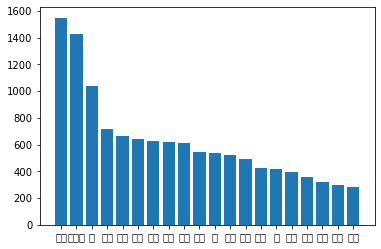

In [12]:
plt.bar(top_nouns.keys(), top_nouns.values())
plt.show()

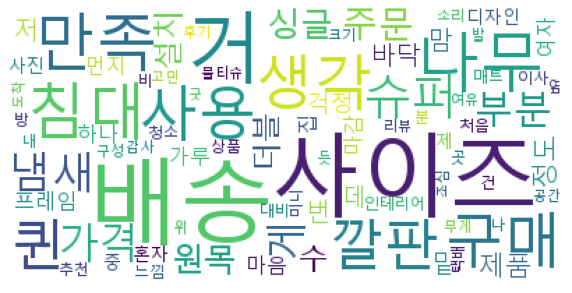

In [13]:
from wordcloud import WordCloud

top_nouns = dict(nouns_counter.most_common(80))

wc = WordCloud(background_color="white", font_path='./font/malgun.ttf')
wc.generate_from_frequencies(top_nouns)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

In [14]:
words = []
for review in a_reviews:
    words.extend(tagger.pos(review))
words[0:10]

[('이런', 'MM'),
 ('거', 'NNB'),
 ('팔', 'VV'),
 ('지', 'EC'),
 ('마세요', 'VX+EP+EF'),
 (':', 'SC'),
 (':', 'SC'),
 ('흐', 'IC'),
 ('기', 'ETN'),
 ('좋', 'VA')]

In [15]:
'''
말뭉치 파일 단어 빈도 분석
- 자료형 구조에 대한 이해
- list, tuple, dict 사용하기
'''
word_dic = {}

for word in words:
    if word[1] == "NNG": #  일반명사 확인하기 --- (※3)
        if not (word[0] in word_dic):
            word_dic[word[0]] = 0
        word_dic[word[0]] += 1 # 카운트하기


print(word_dic)

{'후기': 97, '댓글': 6, '바닥': 242, '나사': 31, '틱': 2, '양심': 2, '직장': 2, '여자': 169, '교환': 51, '비지떡': 6, '말': 39, '원목': 299, '선반': 8, '침대': 644, '사이즈': 1143, '깔판': 545, '싱글': 309, '덕분': 21, '원': 95, '그림': 7, '생각': 626, '때': 356, '높이': 30, '전': 116, '나무': 717, '가루': 188, '먼지': 170, '눈': 17, '첨': 20, '시간': 32, '프레임': 190, '벌레': 21, '개미': 8, '초록빛': 2, '새벽': 5, '돈': 19, '동침': 2, '추천': 129, '더블': 254, '구매': 619, '매트리스': 1604, '슈퍼': 525, '만족': 661, '인테리어': 145, '신분': 3, '참고': 52, '킹사이즈': 63, '정도': 243, '강아지': 23, '곰팡이': 63, '위험': 17, '요소': 3, '오늘': 18, '집': 171, '레트': 3, '모양': 19, '제품': 249, '평': 11, '숲': 12, '선택': 37, '주문': 360, '안정': 36, '고무': 30, '패킹': 9, '배송': 1548, '이틀': 45, '소요': 2, '선결': 5, '옆': 105, '곳': 109, '택배': 91, '비': 134, '착불': 2, '일요일': 6, '밤': 3, '월요일': 7, '발송': 7, '화요일': 14, '도착': 90, '상품': 138, '밖': 25, '미니': 99, '고려': 12, '배': 21, '이미지': 7, '감사': 94, '여유': 88, '처음': 130, '부분': 391, '걱정': 202, '사면': 10, '멀티': 40, '지정': 32, '날짜': 44, '부탁': 9, '색': 62, '겉면': 3, '설치': 283, '반': 38, 

In [16]:
# 값의 수치가 가장 큰 것 부터 역순으로 정렬하여 보여 준다.
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
print(keys[0:20])

[('매트리스', 1604), ('배송', 1548), ('사이즈', 1143), ('나무', 717), ('만족', 661), ('침대', 644), ('생각', 626), ('구매', 619), ('사용', 608), ('깔판', 545), ('슈퍼', 525), ('냄새', 495), ('가격', 425), ('부분', 391), ('주문', 360), ('때', 356), ('싱글', 309), ('원목', 299), ('설치', 283), ('더블', 254)]


## BoW 기반 분석해보기

### 1. 단어 꾸러미 만들기

In [36]:
bows = ['최고', '만족', '좋아요', '감사', '별로', '최악', '가성비', '대박', '비지떡', '허접']
text1 = ' '.join(a_reviews[0:100])
text2 = ' '.join(a_reviews[100:200])
print(text1)
print(text2)

이런거 팔지마세요:: 흐기 좋아서 샀는데 후기 알바인가요?댓글 다들 보시라고 별 다 줬습니다.. 바닥에 까려는데 나사 하나 틱 떨어지고 바닥에 놓아도 흔들려욘.....; 양심 팔지마세요........ 직장인 여자라 교환 힘들기도 하고 번거로워서 그냥 씁니다ㅋ 싼게 비지떡이라는 말 딱 잘어울려요 일부러 원목선반을 올려두고싶어서 저는 침대는 퀸사이즈에 깔판은 싱글로두개시켜서 붙여서깔았어요 덕분에딱 원하는 그림이 나왔네요 저처럼하고싶은 분들은 깔판사이즈 큰거시키는거보다 싱글두개시키는게 더싸요^^ 생각보다 무겁고 다른 리뷰봤을때 깨진데 있다고해서 살펴봤는데 다행히 깨진데 없이 왔어요 깔판 높이가 살짝 더 높았으면 더 좋았을거 같아요 
그리고 침대 올리기 전에 꼭 닦고 올리세요
나무가루?랑 먼지가 눈에 안보이는데 많아요 잘 보이라고 별 5개 남깁니다. 첨엔 싸게 잘 산 줄 알았는데..... 진짜 시간을 되돌릴수 있다면 이걸 산 저를 줘패서라도 말리고싶어요 이런 원목 프레임은 다 이런건지 아님 이것만 이런건진 몰라도 여기서 벌레 엄청 나옵니다.... 생긴건 개미 비슷한데 약간 초록빛이고 날아요;;;; 진짜 여기서 나온 개미 때문에 지금 이 새벽에 개미 엄청 잡았어요;;; 갖다 버릴 건데 진짜 너무 돈 아깝네요 개미들과 동침하고 싶으신 분들께 추천드립니다. 저는 더블사이즈로 구매했어요
매트리스 사이즈는 슈퍼싱글이구요
제가 생각했던데로여서 만족합니다 이런거 팔지마세요:: 흐기 좋아서 샀는데 후기 알바인가요?댓글 다들 보시라고 별 다 줬습니다.. 바닥에 까려는데 나사 하나 틱 떨어지고 바닥에 놓아도 흔들려욘.....; 양심 팔지마세요........ 직장인 여자라 교환 힘들기도 하고 번거로워서 그냥 씁니다ㅋ 싼게 비지떡이라는 말 딱 잘어울려요 일부러 원목선반을 올려두고싶어서 저는 침대는 퀸사이즈에 깔판은 싱글로두개시켜서 붙여서깔았어요 덕분에딱 원하는 그림이 나왔네요 저처럼하고싶은 분들은 깔판사이즈 큰거시키는거보다 싱글두개시키는게 더싸요^^ 생각보다 무겁고 다른 리뷰봤을때 깨진데

### 2. indexing 하기

In [37]:
# 단어-인덱스 딕셔너리
word_to_index = {}

# 토큰을 인덱스로 변환
for bow in bows:
    if token not in word_to_index.keys():
        word_to_index[bow] = len(word_to_index)
        
print(word_to_index)

{'최고': 0, '만족': 1, '좋아요': 2, '감사': 3, '별로': 4, '최악': 5, '가성비': 6, '대박': 7, '비지떡': 8, '허접': 9}


### 3. BoW 기반 카운트 계산하기

In [38]:
# BoW로 변환
def convert_bow(sentence, word_to_index):
    
    # 벡터를 단어의 개수만큼 0으로 초기화
    vector = [0]*(len(word_to_index))

    # 문장을 토큰으로 분리
    tokenizer = Okt()
    tokens = tokenizer.morphs(sentence)
    
    # 단어의 인덱스 위치에 1 설정
    for token in tokens:
        if token in word_to_index.keys():
            vector[word_to_index[token]] += 1
    
    return vector

print(convert_bow(text1, word_to_index))
print(convert_bow(text2, word_to_index))

[0, 1, 19, 0, 2, 0, 0, 0, 0, 0]
[0, 3, 17, 0, 2, 0, 0, 0, 0, 0]


### 4. cos유사도로 문장/문서간 유사도 비교해보기

### 5. 문제점 확인하기

1. 정의한 사전에 없는 단어는 잘 카운트 되지 않는다
2. 정확도가 낮다